# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [27]:
#First, let's import the nesseacary libraries
# NOTE : We used another library, pyenchant, that need to be installed on the kernel using 'pip install pyenchant'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [28]:
df = pd.read_csv("short_essay_scoring.csv", index_col=0)
print ('the data frame has a shape :', df.shape)
print ('let\'s print the first five rows \n', df.head())

the data frame has a shape : (1500, 5)
let's print the first five rows 
                                               answer  \
0  Destiny would be a good friend beacu like to r...   
1  I think Mr.Popper would disagree because he wa...   
2  i think that it has made me a better person be...   
3  A part that I could not stop reading was when ...   
4       its not as good as the any of the other ones   

                                       question_text  \
0  Would you enjoy being friends with the main ch...   
1  Which character do you think would disagree wi...   
2  Do you think reading this text has made you a ...   
3  Tell us about one part of this book that total...   
4  Does this book remind you of the last book you...   

                      text_id  grade  score  
0   AUTJfAnEIe5XGTq1jvkynEr-Q      3      7  
1  BASEvlmqaEWAE9oL3mOT2KG9JQ      3      9  
2  BASEAOH8j3w9WsZOxNQ9dzAUFQ      5      8  
3   AUToHuz362h0RJY-hPa7O6MDw      3      9  
4  BASEasfHPZhAW77njjMy

In [29]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   answer         1500 non-null   object
 1   question_text  1500 non-null   object
 2   text_id        1500 non-null   object
 3   grade          1500 non-null   int64 
 4   score          1500 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 70.3+ KB
None
             grade        score
count  1500.000000  1500.000000
mean      3.453333     6.930667
std       2.343107     2.794590
min      -1.000000     0.000000
25%       2.000000     6.000000
50%       3.000000     8.000000
75%       5.000000     9.000000
max       8.000000    10.000000


In [30]:
# Divide score into 2 categories & replace NaN 
category = pd.cut(df['score'],bins=[0,5,10],labels=['0','1'])
df.insert(5,'score_category',category)
df['score_category'] = df['score_category'].fillna('0')
df.head(50)

,answer,question_text,text_id,grade,score,score_category
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,1
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,1
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0
5,I wuld rather be friends with the last charact...,Would you rather be friends with the main char...,BASEMzne0vBjgFUM6niwywRV5g,3,9,1
6,Tracking sunspots and predicting solar storms ...,Flip through the part of the text you have rea...,BASENMSJzWLV07CKMlT7yr2vPA,7,7,1
7,I rather be friends with the main character be...,Would you rather be friends with the main char...,BASE1sursGwC9Gcmr64d_7Z77A,4,7,1
8,He never gave up when he was turned into a mou...,"The boy is never given a name in the story, ye...",BASEkAITp4dIe3STuqsJ7CGKUw,2,9,1
9,His friend and copying each other and going t...,What does the main character or person really ...,BASEAM1_r5k4MpfL2PfLuQxruQ,2,9,1


In [31]:
# Divide grade into 2 categories & replace NaN 
category = pd.cut(df['grade'],bins=[0,5,10],labels=['0','1'])
df.insert(5,'grade_category',category)
df['grade_category'] = df['grade_category'].fillna('0')
df.head(50)

,answer,question_text,text_id,grade,score,grade_category,score_category
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,0,1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,0,1
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,0,1
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,0,1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0,0
5,I wuld rather be friends with the last charact...,Would you rather be friends with the main char...,BASEMzne0vBjgFUM6niwywRV5g,3,9,0,1
6,Tracking sunspots and predicting solar storms ...,Flip through the part of the text you have rea...,BASENMSJzWLV07CKMlT7yr2vPA,7,7,1,1
7,I rather be friends with the main character be...,Would you rather be friends with the main char...,BASE1sursGwC9Gcmr64d_7Z77A,4,7,0,1
8,He never gave up when he was turned into a mou...,"The boy is never given a name in the story, ye...",BASEkAITp4dIe3STuqsJ7CGKUw,2,9,0,1
9,His friend and copying each other and going t...,What does the main character or person really ...,BASEAM1_r5k4MpfL2PfLuQxruQ,2,9,0,1


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

In [32]:
# nltk sentence tokenizer, word tokenizer, pos tagger, lemmatizer, ngrams

In [33]:
import nltk
# nltk.download()

In [34]:
# WORD TOKENIZER
from nltk.tokenize import word_tokenize
tokens = word_tokenize("This is a sentence")
tokens

['This', 'is', 'a', 'sentence']

In [35]:
# SENT TOKENIZER
from nltk.tokenize import sent_tokenize
sents = sent_tokenize("These are multiple sentences. I know it is Mr. sentence man. haaaaa je suis un petit. hehehe ")
sents

['These are multiple sentences.',
 'I know it is Mr. sentence man.',
 'haaaaa je suis un petit.',
 'hehehe']

In [36]:
# PART OF SPEECH TAGGING
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sentence', 'NN')]

In [37]:
# STOPWORDS
from nltk.corpus import stopwords 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
# NGRAMS
from nltk import ngrams
n = 2
bigrams = ngrams(tokens,n)
print([gram for gram in bigrams])
n = 4
fourgrams = ngrams(tokens,n)
print([gram for gram in fourgrams])

question = "what is the main character ?"
answer = "the main character is Harry POtter. He is an orphan."
n = 3
trigrams_qu = ngrams(word_tokenize(question),n)
trigrams_an = ngrams(word_tokenize(answer),n)
print("========================")
print([gram for gram in trigrams_qu])
print([gram for gram in trigrams_an])

[('This', 'is'), ('is', 'a'), ('a', 'sentence')]
[('This', 'is', 'a', 'sentence')]
[('what', 'is', 'the'), ('is', 'the', 'main'), ('the', 'main', 'character'), ('main', 'character', '?')]
[('the', 'main', 'character'), ('main', 'character', 'is'), ('character', 'is', 'Harry'), ('is', 'Harry', 'POtter'), ('Harry', 'POtter', '.'), ('POtter', '.', 'He'), ('.', 'He', 'is'), ('He', 'is', 'an'), ('is', 'an', 'orphan'), ('an', 'orphan', '.')]


In [39]:
# TFIDF Term Frequency Inverse Document Frequency TF / DF
# => mesure based on all the terms : how is a given word rare/common
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["Add one potatoe and tomato to the pan",
"peel the potatoe and mix with the tomato",
"Bake tomato in a pot for 350 degrees",
"Bake potatoe in a pot for 350 degrees",
"Bake cookies with the tomato and add a tomatoe on the computer"]


vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(corpus)


for r in range(len(corpus)):
    print("ROW " + str(r) + " - " + corpus[r])
    for z in zip(vectorizer.get_feature_names(), X[r,:].toarray()[0]):
        if z[1] > 0:
            print(z)
#print(X[0,:].toarray()[0])

ROW 0 - Add one potatoe and tomato to the pan
('add', 0.5189666820949349)
('pan', 0.6432458258552362)
('potatoe', 0.43078922631751043)
('tomato', 0.36239347798208316)
ROW 1 - peel the potatoe and mix with the tomato
('mix', 0.6012854497921586)
('peel', 0.6012854497921586)
('potatoe', 0.40268787343866097)
('tomato', 0.338753734033932)
ROW 2 - Bake tomato in a pot for 350 degrees
('350', 0.4893109154841178)
('bake', 0.406172261115514)
('degrees', 0.4893109154841178)
('pot', 0.4893109154841178)
('tomato', 0.3416849107944251)
ROW 3 - Bake potatoe in a pot for 350 degrees
('350', 0.47792215686353867)
('bake', 0.39671856267176947)
('degrees', 0.47792215686353867)
('pot', 0.47792215686353867)
('potatoe', 0.39671856267176947)
ROW 4 - Bake cookies with the tomato and add a tomatoe on the computer
('add', 0.3838903309242765)
('bake', 0.3186636528997633)
('computer', 0.4758221702333755)
('cookies', 0.4758221702333755)
('tomato', 0.26806991081923104)
('tomatoe', 0.4758221702333755)


In [40]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
l = ["liking","likes","like"]
[st.stem(t) for t in l]

['lik', 'lik', 'lik']

## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [41]:
df['length'] = [len(answer) for answer in df.answer]
df

,answer,question_text,text_id,grade,score,grade_category,score_category,length
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,0,1,103
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,0,1,215
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,0,1,149
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,0,1,146
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0,0,44
...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,1,1,373
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,0,1,109
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,0,0,66
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,0,0,107


Text(0.5, 1.0, 'Char Length vs. Score')

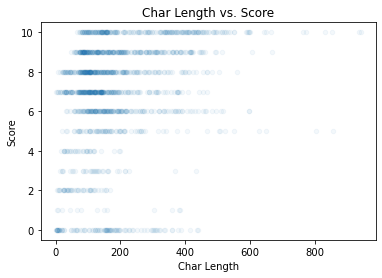

In [42]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [43]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))

train score = 0.0750142588037207
test score = 0.013233546425281517


In [45]:
# Other exemple of advanced feature
qu = df.question_text[0] #select a qu
an = df[df.question_text == qu] #select an of this qu

# tokenize lower case qu then filter stemmed tokens with stopwords list
qu_stem = [st.stem(token) for token in word_tokenize(qu.lower()) 
           if not token in stopwords.words('english')]

print(qu_stem)

for a in an.answer:
    print("=============") #compare stemmed ans to stemed qu
    print(len([token for token in word_tokenize(a.lower())
              if st.stem(token) in qu_stem]),a)


['would', 'enjoy', 'friend', 'main', 'charact', 'person', 'text', '?', 'explain', '.']
2 Destiny would be a good friend beacu like to read too an destiny like too where about the the same size
6 Yes, because George and Harold make hilarious pranks and are pranksters and daredevils. Also, they are dramatic in the story and I would say that drama is in my personality too. Another reason, is that they are awesome and have a tree house to make comics for their schoolmates to read at school. The last reason, is because they are creative.
8 I would because it would be nice to be friends . I would get more friends.So if i had more friends my brother would not bully me.
1 yes because it would be an adventure  to live that life and to be happy all day with your best freind
1 I like Amelia because she is fun and is help full and she saved the head that looks like the one she had before.Everyone was so happy that she saved the real one.Some one else broke the one without a price.
4 I do not want 

## 4. Feature Engineering
Create at least 3 different features

In [46]:
# 1st feature : number of filtered word in an answer
def count_words(asw):   
    data = str(asw)
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(data)
    wordsFiltered = []

    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)

    # print(wordsFiltered)
    # print(len(wordsFiltered))
    nb = len(wordsFiltered)
    return nb

df['nb_filt_word'] = [count_words(answer) for answer in df.answer]
df.head(10)

,answer,question_text,text_id,grade,score,grade_category,score_category,length,nb_filt_word
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,0,1,103,10
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,0,1,215,22
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,0,1,149,12
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,0,1,146,13
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0,0,44,2
5,I wuld rather be friends with the last charact...,Would you rather be friends with the main char...,BASEMzne0vBjgFUM6niwywRV5g,3,9,0,1,112,14
6,Tracking sunspots and predicting solar storms ...,Flip through the part of the text you have rea...,BASENMSJzWLV07CKMlT7yr2vPA,7,7,1,1,374,46
7,I rather be friends with the main character be...,Would you rather be friends with the main char...,BASE1sursGwC9Gcmr64d_7Z77A,4,7,0,1,83,8
8,He never gave up when he was turned into a mou...,"The boy is never given a name in the story, ye...",BASEkAITp4dIe3STuqsJ7CGKUw,2,9,0,1,144,14
9,His friend and copying each other and going t...,What does the main character or person really ...,BASEAM1_r5k4MpfL2PfLuQxruQ,2,9,0,1,132,15


In [47]:
# 2nd feature : word lenght
df['word_lenght'] = [len(word_tokenize(answer)) for answer in df.answer]
df.head(10)

,answer,question_text,text_id,grade,score,grade_category,score_category,length,nb_filt_word,word_lenght
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,0,1,103,10,21
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,0,1,215,22,43
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,0,1,149,12,32
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,0,1,146,13,29
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0,0,44,2,11
5,I wuld rather be friends with the last charact...,Would you rather be friends with the main char...,BASEMzne0vBjgFUM6niwywRV5g,3,9,0,1,112,14,22
6,Tracking sunspots and predicting solar storms ...,Flip through the part of the text you have rea...,BASENMSJzWLV07CKMlT7yr2vPA,7,7,1,1,374,46,81
7,I rather be friends with the main character be...,Would you rather be friends with the main char...,BASE1sursGwC9Gcmr64d_7Z77A,4,7,0,1,83,8,16
8,He never gave up when he was turned into a mou...,"The boy is never given a name in the story, ye...",BASEkAITp4dIe3STuqsJ7CGKUw,2,9,0,1,144,14,31
9,His friend and copying each other and going t...,What does the main character or person really ...,BASEAM1_r5k4MpfL2PfLuQxruQ,2,9,0,1,132,15,26


In [48]:
## 3rd feature : is there a verb in the answer
def tag_verb(sent):
    words = nltk.word_tokenize(sent)
    tags = nltk.pos_tag(words)
    for t in tags:
        if (t[1] == 'VB' or t[1] == 'VBZ' or t[1] == 'VBD'):
            return 1
    return 0

df['verb'] = df['answer'].apply(lambda x: tag_verb(x))
df

,answer,question_text,text_id,grade,score,grade_category,score_category,length,nb_filt_word,word_lenght,verb
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,0,1,103,10,21,1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,0,1,215,22,43,1
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,0,1,149,12,32,1
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,0,1,146,13,29,1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0,0,44,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,1,1,373,44,70,1
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,0,1,109,10,25,1
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,0,0,66,14,14,1
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,0,0,107,13,22,1


## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

Text(0.5, 1.0, 'Number of words filtered vs. Score')

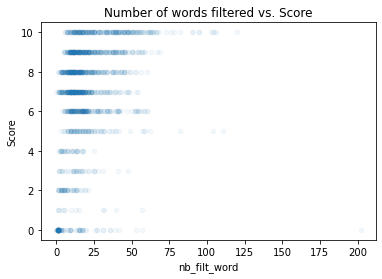

In [49]:
## Number of words filtered
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'nb_filt_word', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('nb_filt_word')
ax.set_ylabel('Score')
ax.set_title('Number of words filtered vs. Score')

Text(0.5, 1.0, 'Word Length vs. Score')

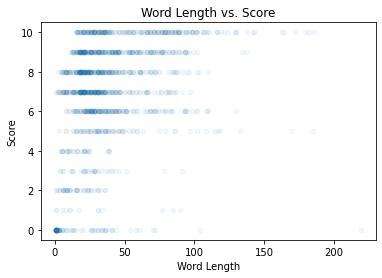

In [50]:
## Word lenght
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'word_lenght', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Word Length')
ax.set_ylabel('Score')
ax.set_title('Word Length vs. Score')

      total  score  percentage
verb                          
0       123    291       23.66
1      1377  10105       73.38


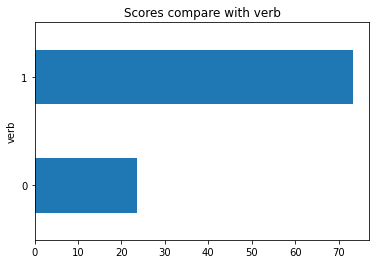

Text(0.5, 1.0, 'Is there a verb vs. Score')

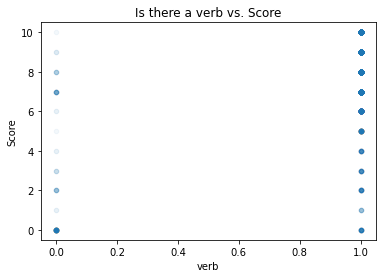

In [51]:
## Is there a verb in the answer
# 1st chart
def make_bar_plot(df, column):
    dfo=pd.DataFrame()
    dfo['total']=df.groupby(column).size()
    dfo['score'] = df.groupby(column).sum()['score']
    dfo['percentage'] = round(dfo['score']/dfo['total']*10,2)
    print(dfo)

    dfo['percentage'].plot(kind="barh")
    dfo['percentage'].plot(kind="barh",alpha=0.5,title="Scores compare with "+str(column))
    plt.show()
make_bar_plot(df,'verb')

## 2nd chart
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'verb', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('verb')
ax.set_ylabel('Score')
ax.set_title('Is there a verb vs. Score')

In [52]:
df

,answer,question_text,text_id,grade,score,grade_category,score_category,length,nb_filt_word,word_lenght,verb
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,0,1,103,10,21,1
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,0,1,215,22,43,1
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,0,1,149,12,32,1
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,0,1,146,13,29,1
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,0,0,44,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,If I could intervine at a point in the story I...,If you could intervene to help one character o...,BASEZDorsWoGtS2767yl5eQATg,7,9,1,1,373,44,70,1
1496,I picked the page that he fell to the ground a...,Pick any picture in this book. What does this ...,BASE1DgC9AJQDckNNg-UAujv_Q,2,7,0,1,109,10,25,1
1497,The Part Where It Says The Part Where It Says ...,Describe a part of this text that you believe ...,LEXILElIP5LQSKy97_2ppxc3KuMA,4,0,0,0,66,14,14,1
1498,I would rather live in the world because earth...,Would you rather live in the world described i...,BASEVRC8J4bm-WChS_qczxKQMQ,5,5,0,0,107,13,22,1


## 6. Model Training
Pick a model, fit your features and print performance metrics

In [53]:
## YOUR CODE HERE FOR MODEL TRAINING
y = df['score_category']
X = df.drop(['score_category','grade','text_id','question_text','length','answer','score','grade_category'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X

,nb_filt_word,word_lenght,verb
0,10,21,1
1,22,43,1
2,12,32,1
3,13,29,1
4,2,11,0
...,...,...,...
1495,44,70,1
1496,10,25,1
1497,14,14,1
1498,13,22,1


In [54]:
## LINEAR REGRESSION
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

In [55]:
## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=1)
clf_log.fit(X_train, y_train)

scores_log = cross_val_score(clf_log, X_train, y_train, scoring='accuracy', cv=5)

In [56]:
## RANDOM FOREST CLASS
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = 1)
clf_rf.fit(X_train, y_train)

scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)

In [57]:
## YOUR CODE HERE FOR PRINTING PERFORMANCES

#Linear regression 
print("=> Linear Regresion")
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))
print("==============")
#Logistic regression
print("=> Logistic Regresion")
print ('train accuracy =', clf_log.score(X_train, y_train))
print('cross validation r2 =', scores_log.mean())
print("==============")
#RandomForestClassifier
print("=> RandomForestClassifier")
print ('train accuracy =', clf_rf.score(X_train, y_train))
print ('test accuracy =', clf_rf.score(X_test, y_test))
print('cross validation accuracy =', scores_rf.mean())

=> Linear Regresion
train score = 0.13286876036381678
test score = 0.22041501199592972
=> Logistic Regresion
train accuracy = 0.8333333333333334
cross validation r2 = 0.8323809523809524
=> RandomForestClassifier
train accuracy = 0.9085714285714286
test accuracy = 0.7622222222222222
cross validation accuracy = 0.7923809523809524


In [58]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1, 4, 7],
          'min_samples_split':[2, 4, 6, 8, 10],
          'n_estimators':[10, 20, 30],
          'max_depth': [2,3]}

clf_gs = GridSearchCV(clf_rf, params, scoring = 'accuracy', cv=5)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [59]:
print('Best score : ', clf_gs.best_score_)
print('Best parameters : ', clf_gs.best_params_)

Best score :  0.8361904761904763
Best parameters :  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

In [60]:
d = {'Feature Importance': clf_gs.best_estimator_.feature_importances_}
df2 = pd.DataFrame(d, index = [X.columns])
df2 = df2.sort_values(by='Feature Importance', ascending=0)
df2

,Feature Importance
nb_filt_word,0.460204
word_lenght,0.419736
verb,0.120059


In [61]:
from sklearn import metrics
y_pred = clf_rf.predict(X_test)
#size of the prediction sample
print(len(y_pred))
print(y_pred)

450
['1' '1' '1' '1' '0' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0'
 '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '0' '1

In [62]:
y_probs = clf_rf.predict_proba(X_test)
print (y_probs)

[[0.         1.        ]
 [0.15       0.85      ]
 [0.31833333 0.68166667]
 [0.02       0.98      ]
 [0.57       0.43      ]
 [0.01       0.99      ]
 [0.01       0.99      ]
 [0.         1.        ]
 [0.89195238 0.10804762]
 [0.96846915 0.03153085]
 [0.04       0.96      ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.045      0.955     ]
 [0.03       0.97      ]
 [0.41645438 0.58354562]
 [0.53445238 0.46554762]
 [0.08071003 0.91928997]
 [0.18       0.82      ]
 [0.         1.        ]
 [0.02254762 0.97745238]
 [0.03166667 0.96833333]
 [0.01075    0.98925   ]
 [0.58       0.42      ]
 [0.         1.        ]
 [0.21966667 0.78033333]
 [0.41645438 0.58354562]
 [0.0125     0.9875    ]
 [0.         1.        ]
 [0.4875     0.5125    ]
 [0.03166667 0.96833333]
 [0.         1.        ]
 [0.         1.        ]
 [0.01       0.99      ]
 [0.04889286 0.95110714]
 [0.         1.        ]
 [0.06928571 0.93071429]
 [0.025      0.975     ]
 [0.49739286 0.50260714]


In [63]:
## Written interpretation.
## Our results show that we have a better performance with the 2 features word_length & number of filtered words.
## When we look at the charts, we can observe that the scores become greater from a certain value :
##    - around 15 words for nb_filt_words => grades >= 6
##    - around25 word length => grades >= 6
## I think we could have better results by using dummies variables.
## For the 3rd feature, we can observe that the scores are much better when verbs are include in answers.
## In order to improve results accuracy, we could have had more options like other word's type (nouns...)
## It would also have been great to filter and compare the pos_tag function for all words in order to 
## remove weird situation like 3 verbs in a row.

## 8. Second interation improvement


In [64]:
## NEW FEATURE ENGINEERING : 
import enchant
d = enchant.Dict("en_US")
def word_exist(tokenized_sent):
    compteur = 0
    for x in tokenized_sent:
        if d.check(x) == False:
            compteur = compteur +1
    pourc = (100*compteur)/(len(tokenized_sent))
    return pourc
    
tokenized_sents = df.apply(lambda row: nltk.word_tokenize(row['answer']), axis=1)
df['pourc_exist_words'] = [word_exist(answer) for answer in tokenized_sents]

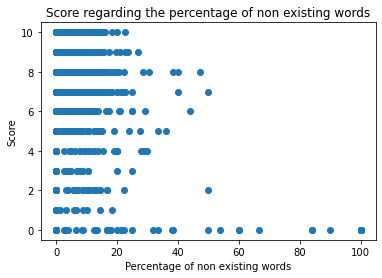

In [65]:
# VISUALIZE THIS FEATURE
x = df['pourc_exist_words']
y = df['score']
plt.xlabel('Percentage of non existing words')
plt.ylabel('Score')
plt.title('Score regarding the percentage of non existing words')
plt.scatter(x,y)

In [67]:
## NEW MODEL TRAINING

y = df['score_category']
X = df.drop(['score_category','grade','text_id','question_text','length','answer','score','grade_category'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X
## LINEAR REGRESSION
reg = LinearRegression()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

## RANDOM FOREST CLASS
clf_rf = RandomForestClassifier(random_state = 1)
clf_rf.fit(X_train, y_train)

scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)

In [68]:
#Linear regression 
print("=> Linear Regresion")
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))
print("==============")
#RandomForestClassifier
print("=> RandomForestClassifier")
print ('train accuracy =', clf_rf.score(X_train, y_train))
print ('test accuracy =', clf_rf.score(X_test, y_test))
print('cross validation accuracy =', scores_rf.mean())

=> Linear Regresion
train score = 0.18757400483481312
test score = 0.22487733280389555
=> RandomForestClassifier
train accuracy = 0.960952380952381
test accuracy = 0.7866666666666666
cross validation accuracy = 0.7952380952380952


In [69]:
## NEW PERFORMANCE ASSESMENT
clf_gs = GridSearchCV(clf_rf, params, scoring = 'accuracy', cv=5)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [70]:
print('Best score : ', clf_gs.best_score_)
print('Best parameters : ', clf_gs.best_params_)

Best score :  0.8400000000000001
Best parameters :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [71]:
d = {'Feature Importance': clf_gs.best_estimator_.feature_importances_}
df3 = pd.DataFrame(d, index = [X.columns])
df3 = df3.sort_values(by='Feature Importance', ascending=0)
df3

,Feature Importance
nb_filt_word,0.631163
pourc_exist_words,0.178631
word_lenght,0.172674
verb,0.017533
